<a href="https://colab.research.google.com/github/hiydavid/time-series/blob/main/preprocessing/feature_extraction_with_kats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Features Extraction with Kats
---
Perform time series extraction with Facebook Kats:
* Generate time series
    1. Simulating using ARIMA
    2. Simulating using STL
* Use Facebook's Kats library to extract features

Resources:
* Kats [repo](https://github.com/facebookresearch/Kats) by Facebook Research
* Documented [full list](https://facebookresearch.github.io/Kats/api/kats.tsfeatures.tsfeatures.html) of features calculated by Kats

---
# Load libraries

In [ ]:
!pip install kats

In [2]:
# load libraries
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures

import warnings
warnings.simplefilter(action='ignore')

data_path = '/content/drive/MyDrive/Colab/time_series/data/'

---
# Random Time Series Generation

In [3]:
# generating random time series
sim = Simulator(n=90, freq="D", start = "2021-01-01")
random_seed = 100

# generate 10 TimeSeriesData with arima_sim
np.random.seed(random_seed) # setting numpy seed
arima_sim_list = [
    sim.arima_sim(
        ar = [0.1, 0.05], 
        ma = [0.04, 0.1], 
        d = 1
    ) for _ in range(10)
]

# generate 10 TimeSeriesData with trend shifts
trend_sim_list = [
    sim.trend_shift_sim(
        cp_arr = [30, 60, 75],
        trend_arr = [3, 15, 2, 8],
        intercept = 30,
        noise = 50,
        seasonal_period = 7,
        seasonal_magnitude = np.random.uniform(10, 100),
        random_seed = random_seed
    ) for _ in range(10)
]


# generate 10 TimeSeriesData with level shifts
level_shift_list = [
    sim.level_shift_sim(
        cp_arr = [30, 60, 75],
        level_arr = [1.35, 1.05, 1.35, 1.2],
        noise = 0.05,
        seasonal_period = 7,
        seasonal_magnitude = np.random.uniform(0.1, 1.0),
        random_seed = random_seed
    ) for _ in range(10)
]

# putting it all together
ts_list = arima_sim_list + trend_sim_list + level_shift_list

---
# List of Extractable Features

In [15]:
# list and its groupings
feature_group_mapping = TsFeatures().feature_group_mapping
pprint.pprint(feature_group_mapping)

{'acfpacf_features': ['y_acf1',
                      'y_acf5',
                      'diff1y_acf1',
                      'diff1y_acf5',
                      'diff2y_acf1',
                      'diff2y_acf5',
                      'y_pacf5',
                      'diff1y_pacf5',
                      'diff2y_pacf5',
                      'seas_acf1',
                      'seas_pacf1'],
 'bocp_detector': ['bocp_num', 'bocp_conf_max', 'bocp_conf_mean'],
 'cusum_detector': ['cusum_num',
                    'cusum_conf',
                    'cusum_cp_index',
                    'cusum_delta',
                    'cusum_llr',
                    'cusum_regression_detected',
                    'cusum_stable_changepoint',
                    'cusum_p_value'],
 'holt_params': ['holt_alpha', 'holt_beta'],
 'hw_params': ['hw_alpha', 'hw_beta', 'hw_gamma'],
 'level_shift_features': ['level_shift_idx', 'level_shift_size'],
 'nowcasting': ['nowcast_roc',
                'nowcast_ma',
         

---
# Singel Time Series Feature Extraction

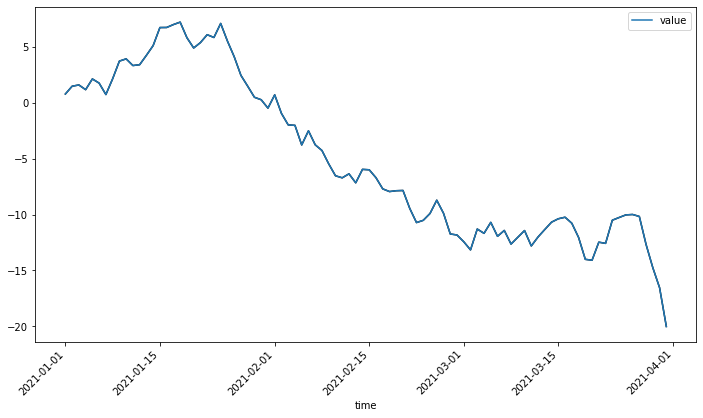

In [4]:
# select one ts and plot
ts = ts_list[0]
ts.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()

In [5]:
# extract features
model = TsFeatures()
output_features = model.transform(ts)
output_features

{'binarize_mean': 0.43333333333333335,
 'crossing_points': 5,
 'diff1y_acf1': 0.18302337359382667,
 'diff1y_acf5': 0.07947604177686789,
 'diff1y_pacf5': 0.0798179214470633,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.244768248661085,
 'diff2y_pacf5': 0.36145785941160097,
 'entropy': 0.2742447620827894,
 'firstmin_ac': 53,
 'firstzero_ac': 30,
 'flat_spots': 1,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'holt_alpha': 0.9999999850988388,
 'holt_beta': 0.13656079632757895,
 'hurst': 0.41884368965647256,
 'hw_alpha': nan,
 'hw_beta': nan,
 'hw_gamma': nan,
 'length': 90,
 'level_shift_idx': 23,
 'level_shift_size': 0.7134342301151566,
 'linearity': 0.8346355269096618,
 'lumpiness': 10.258210327109449,
 'mean': -4.973228083549793,
 'peak': 1,
 'seas_acf1': 0.8149983814152568,
 'seas_pacf1': 0.030344962550474527,
 'seasonality_strength': 0.3521955818150291,
 'spikiness': 0.00020455870537077657,
 'stability': 45.07760417461487,
 'std1st_der': 0.87

---
# Multiple Time Series Feature Extraction

In [6]:
# loop through entire list of generated time series
model = TsFeatures()
output_features = [model.transform(ts) for ts in ts_list]

In [7]:
# output into a feature data frame
df_features = pd.DataFrame(output_features)
df_features.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,binarize_mean,unitroot_kpss,heterogeneity,histogram_mode,linearity,trend_strength,seasonality_strength,spikiness,peak,trough,level_shift_idx,level_shift_size,y_acf1,y_acf5,diff1y_acf1,diff1y_acf5,diff2y_acf1,diff2y_acf5,y_pacf5,diff1y_pacf5,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,90,-4.973228,50.694998,0.274245,10.258210,45.077604,1,0.418844,0.877359,5,0.433333,0.416411,73.295272,-11.841676,0.834636,0.985303,0.352196,0.000205,1,6,23,0.713434,0.959758,4.036183,0.183023,0.079476,-0.481691,0.244768,0.986259,0.079818,0.361458,0.814998,0.030345,53,30,1.000000,0.136561,NaN,NaN,NaN
1,90,-2.058767,10.041589,0.366121,23.888037,5.711696,1,0.449241,0.701685,8,0.411111,0.397272,61.437672,-5.456243,0.144855,0.962898,0.369521,0.000022,5,2,69,0.566508,0.902696,2.726653,-0.091535,0.062756,-0.625373,0.451010,0.870669,0.068862,0.749517,0.327535,-0.226641,21,11,0.866466,0.091103,NaN,NaN,NaN
2,90,9.908474,54.513387,0.371858,44.741126,45.977900,1,0.249448,0.983165,3,0.488889,0.338205,78.065196,10.116202,0.787592,0.984925,0.378044,0.000197,4,1,21,0.653428,0.947841,3.504109,0.291699,0.177916,-0.428888,0.233229,0.936070,0.166344,0.324193,0.668572,0.124300,55,31,1.000000,0.266836,NaN,NaN,NaN
3,90,-4.852956,21.728208,0.492625,9.067492,16.945737,1,0.377345,0.705047,11,0.600000,0.816956,78.428172,-2.517814,0.612783,0.973171,0.174180,0.000090,2,6,69,0.556931,0.928283,3.114044,0.000746,0.088747,-0.628944,0.612680,0.901193,0.082085,0.533415,0.524764,0.009480,31,27,1.000000,0.000000,NaN,NaN,NaN
4,90,-1.521848,28.601801,0.402300,259.161089,17.962647,1,0.543165,0.880529,6,0.366667,0.770582,75.763265,-3.471386,0.132895,0.982579,0.423375,0.000087,5,0,69,0.876386,0.921949,2.918618,0.212760,0.144393,-0.530624,0.420991,0.891398,0.138309,0.460363,0.398363,-0.106916,25,16,1.000000,0.102416,NaN,NaN,NaN


---
# Applications using TsFeatures

## Seasonal Strength

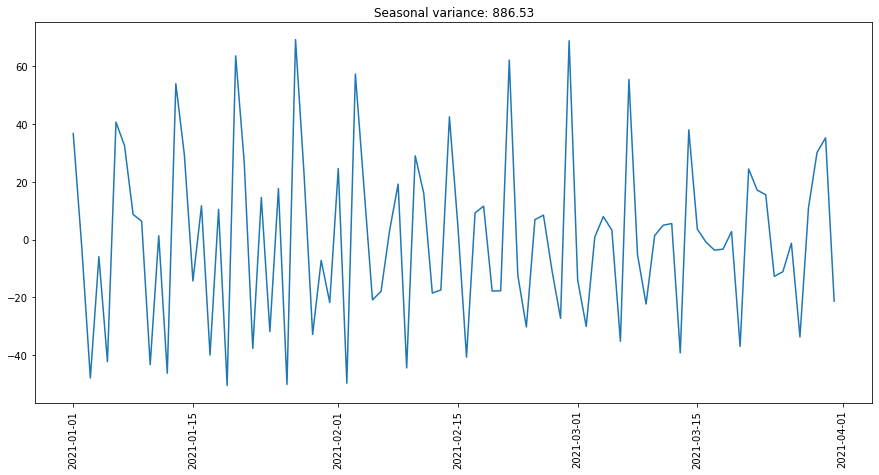

In [37]:
# finding the index of the time series sample with the highest seasonality strength
index_target_ts = df_features['seasonality_strength'].argmax() 
target_ts = ts_list[index_target_ts] 

# use STL to see seasonal component
stl = STL(target_ts.value.values, period = 7)
res = stl.fit()

# plot
plt.figure(figsize = (15, 7))
plt.plot(
    pd.to_datetime(target_ts.time.values),
    res.seasonal
)
plt.xticks(rotation = 90);
plt.title(f'Seasonal variance: {np.round(np.var(res.seasonal), 2)}');

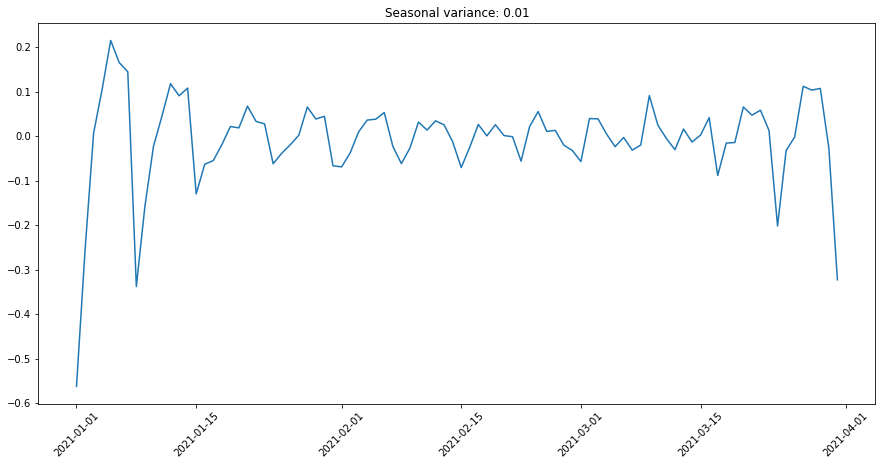

In [38]:
# finding the index of the time series sample with the smallest seasonality strength
index_target_ts = df_features['seasonality_strength'].argmin() 
target_ts = ts_list[index_target_ts].to_dataframe() 

# Do an STL decomposition and plot the results
stl = STL(target_ts.value.values, period = 7)
res = stl.fit()

# plot
plt.figure(figsize = (15, 7))
plt.plot(
    pd.to_datetime(target_ts.time.values),
    res.seasonal
)
plt.xticks(rotation = 45);
plt.title(f'Seasonal variance: {np.round(np.var(res.seasonal), 2)}');

## Level of Entropy (Predictability)

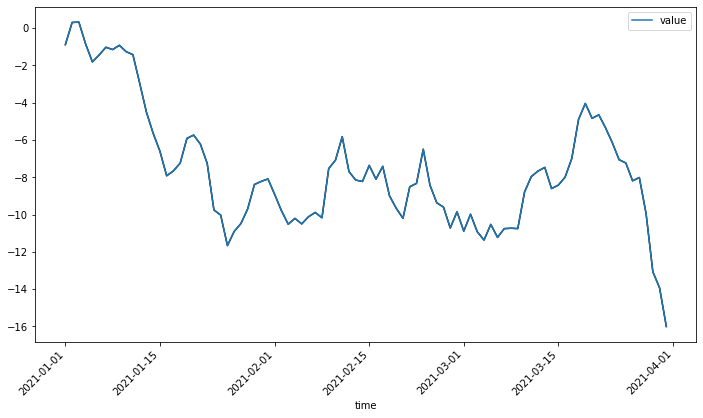

In [13]:
# find the index of the time series sample with the highest entropy
target_ts = ts_list[df_features['entropy'].argmax()] 

# Plot the time series
target_ts.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()

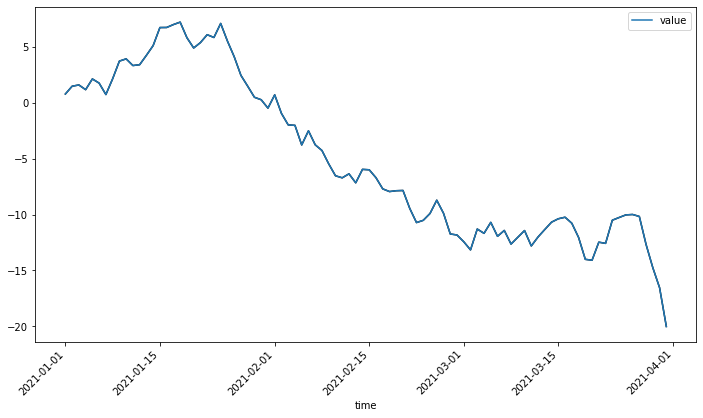

In [14]:
# find the index of the time series sample with the lowest entropy
target_ts = ts_list[df_features['entropy'].argmin() ]

# Plot the time series
target_ts.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()

## Cluster Similar Time Series

In [17]:
# performing dimension reduction on the time series samples
ls_features = ['lumpiness', 'entropy', 'seasonality_strength', 
               'stability', 'level_shift_size']
df_dataset = df_features[ls_features]
x_2d = PCA(n_components=2).fit_transform(
    X=StandardScaler().fit_transform(df_dataset[ls_features].values))
df_dataset['pca_component_1'] = x_2d[:, 0]
df_dataset['pca_component_2'] = x_2d[:, 1]

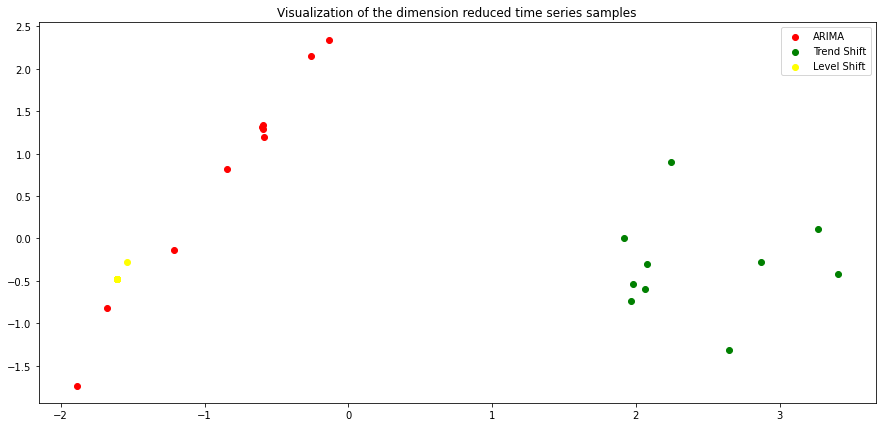

In [35]:
# Plot the PCA projections of each time series
fig, axs = plt.subplots(1, 1, figsize = (15, 7), sharex = True, sharey = True)
pca_x = 'pca_component_1'
pca_y = 'pca_component_2'
axs.scatter(df_dataset.iloc[0:10][pca_x], df_dataset.iloc[0:10][pca_y], color='red')
axs.scatter(df_dataset.iloc[10:20][pca_x], df_dataset.iloc[10:20][pca_y], color='green')
axs.scatter(df_dataset.iloc[20:][pca_x], df_dataset.iloc[20:][pca_y], color='yellow')
plt.title('Visualization of the dimension reduced time series samples')
plt.legend(['ARIMA', 'Trend Shift', 'Level Shift'])
plt.show()